In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import fbprophet
import seaborn as sns

In [13]:
# Read data
df = pd.read_csv('crime.csv', encoding='iso-8859-1')
offense_codes = pd.read_csv('offense_codes.csv', encoding='iso-8859-1')

In [14]:
# Set DateTime Index
df.columns = [str.lower(col) for col in df.columns]
df['occurred_on_date'] = pd.to_datetime(df.occurred_on_date)
df = df.set_index('occurred_on_date')
#print('Data first entry: {}, last entry: {}'.format(df.index.min(), df.index.max()))
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location
occurred_on_date,,,,,,,,,,,,,,,,
2018-09-02 13:00:00,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
2018-08-21 00:00:00,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2018-09-03 19:27:00,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
2018-09-03 21:16:00,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
2018-09-03 21:05:00,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05 17:25:00,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
2015-07-09 13:38:00,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
2015-07-09 13:38:00,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"


In [6]:
daily_crimes

,y,ds
occurred_on_date,,
2015-06-15,35,2015-06-15
2015-06-16,41,2015-06-16
2015-06-17,27,2015-06-17
2015-06-18,73,2015-06-18
2015-06-19,60,2015-06-19
...,...,...
2018-08-30,31,2018-08-30
2018-08-31,43,2018-08-31
2018-09-01,36,2018-09-01


## District-level monthly distribution by ucr_part by district

In [ ]:
# Subset of main df with respect to ucr_part
partone = df[df.ucr_part == 'Part One']
parttwo = df[df.ucr_part == 'Part Two']
partthree = df[df.ucr_part == 'Part Three']

In [49]:
# List of distinct districts
districts = df.district.unique()
districts

In [127]:
# Part 1 monthly crime count

partone_D14 = pd.DataFrame(partone[partone.district=='D14'].groupby('month').count()['ucr_part'])
partone_C11 = pd.DataFrame(partone[partone.district=='C11'].groupby('month').count()['ucr_part'])
partone_D4 = pd.DataFrame(partone[partone.district=='D4'].groupby('month').count()['ucr_part'])
partone_B3 = pd.DataFrame(partone[partone.district=='B3'].groupby('month').count()['ucr_part'])
partone_B2 = pd.DataFrame(partone[partone.district=='B2'].groupby('month').count()['ucr_part'])
partone_C6 = pd.DataFrame(partone[partone.district=='C6'].groupby('month').count()['ucr_part'])
partone_A1 = pd.DataFrame(partone[partone.district=='A1'].groupby('month').count()['ucr_part'])
partone_E5 = pd.DataFrame(partone[partone.district=='E5'].groupby('month').count()['ucr_part'])
partone_A7 = pd.DataFrame(partone[partone.district=='A7'].groupby('month').count()['ucr_part'])
partone_E13 = pd.DataFrame(partone[partone.district=='E13'].groupby('month').count()['ucr_part'])
partone_E18 = pd.DataFrame(partone[partone.district=='E18'].groupby('month').count()['ucr_part'])
partone_A15 = pd.DataFrame(partone[partone.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partone_A1, partone_A15, partone_A7, partone_B2, partone_B3, partone_C6, 
          partone_C11, partone_D14, partone_D4, partone_E13, partone_E18, partone_E5]

partone_districts = pd.concat(frames,axis=1)
partone_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partone_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,643,87,160,661,346,314,524,274,878,271,207,133
2,508,70,144,498,282,272,401,286,803,236,170,114
3,542,101,144,597,311,297,415,252,844,215,163,106
4,537,80,168,611,371,340,492,261,858,230,185,156
5,665,108,182,687,401,347,537,291,948,246,187,140
6,796,144,196,861,515,495,667,379,1171,371,253,177
7,1012,143,262,1046,540,502,808,377,1473,415,322,199
8,1028,132,245,1006,583,531,719,454,1377,390,298,226
9,822,106,207,762,392,359,557,393,1057,317,206,156


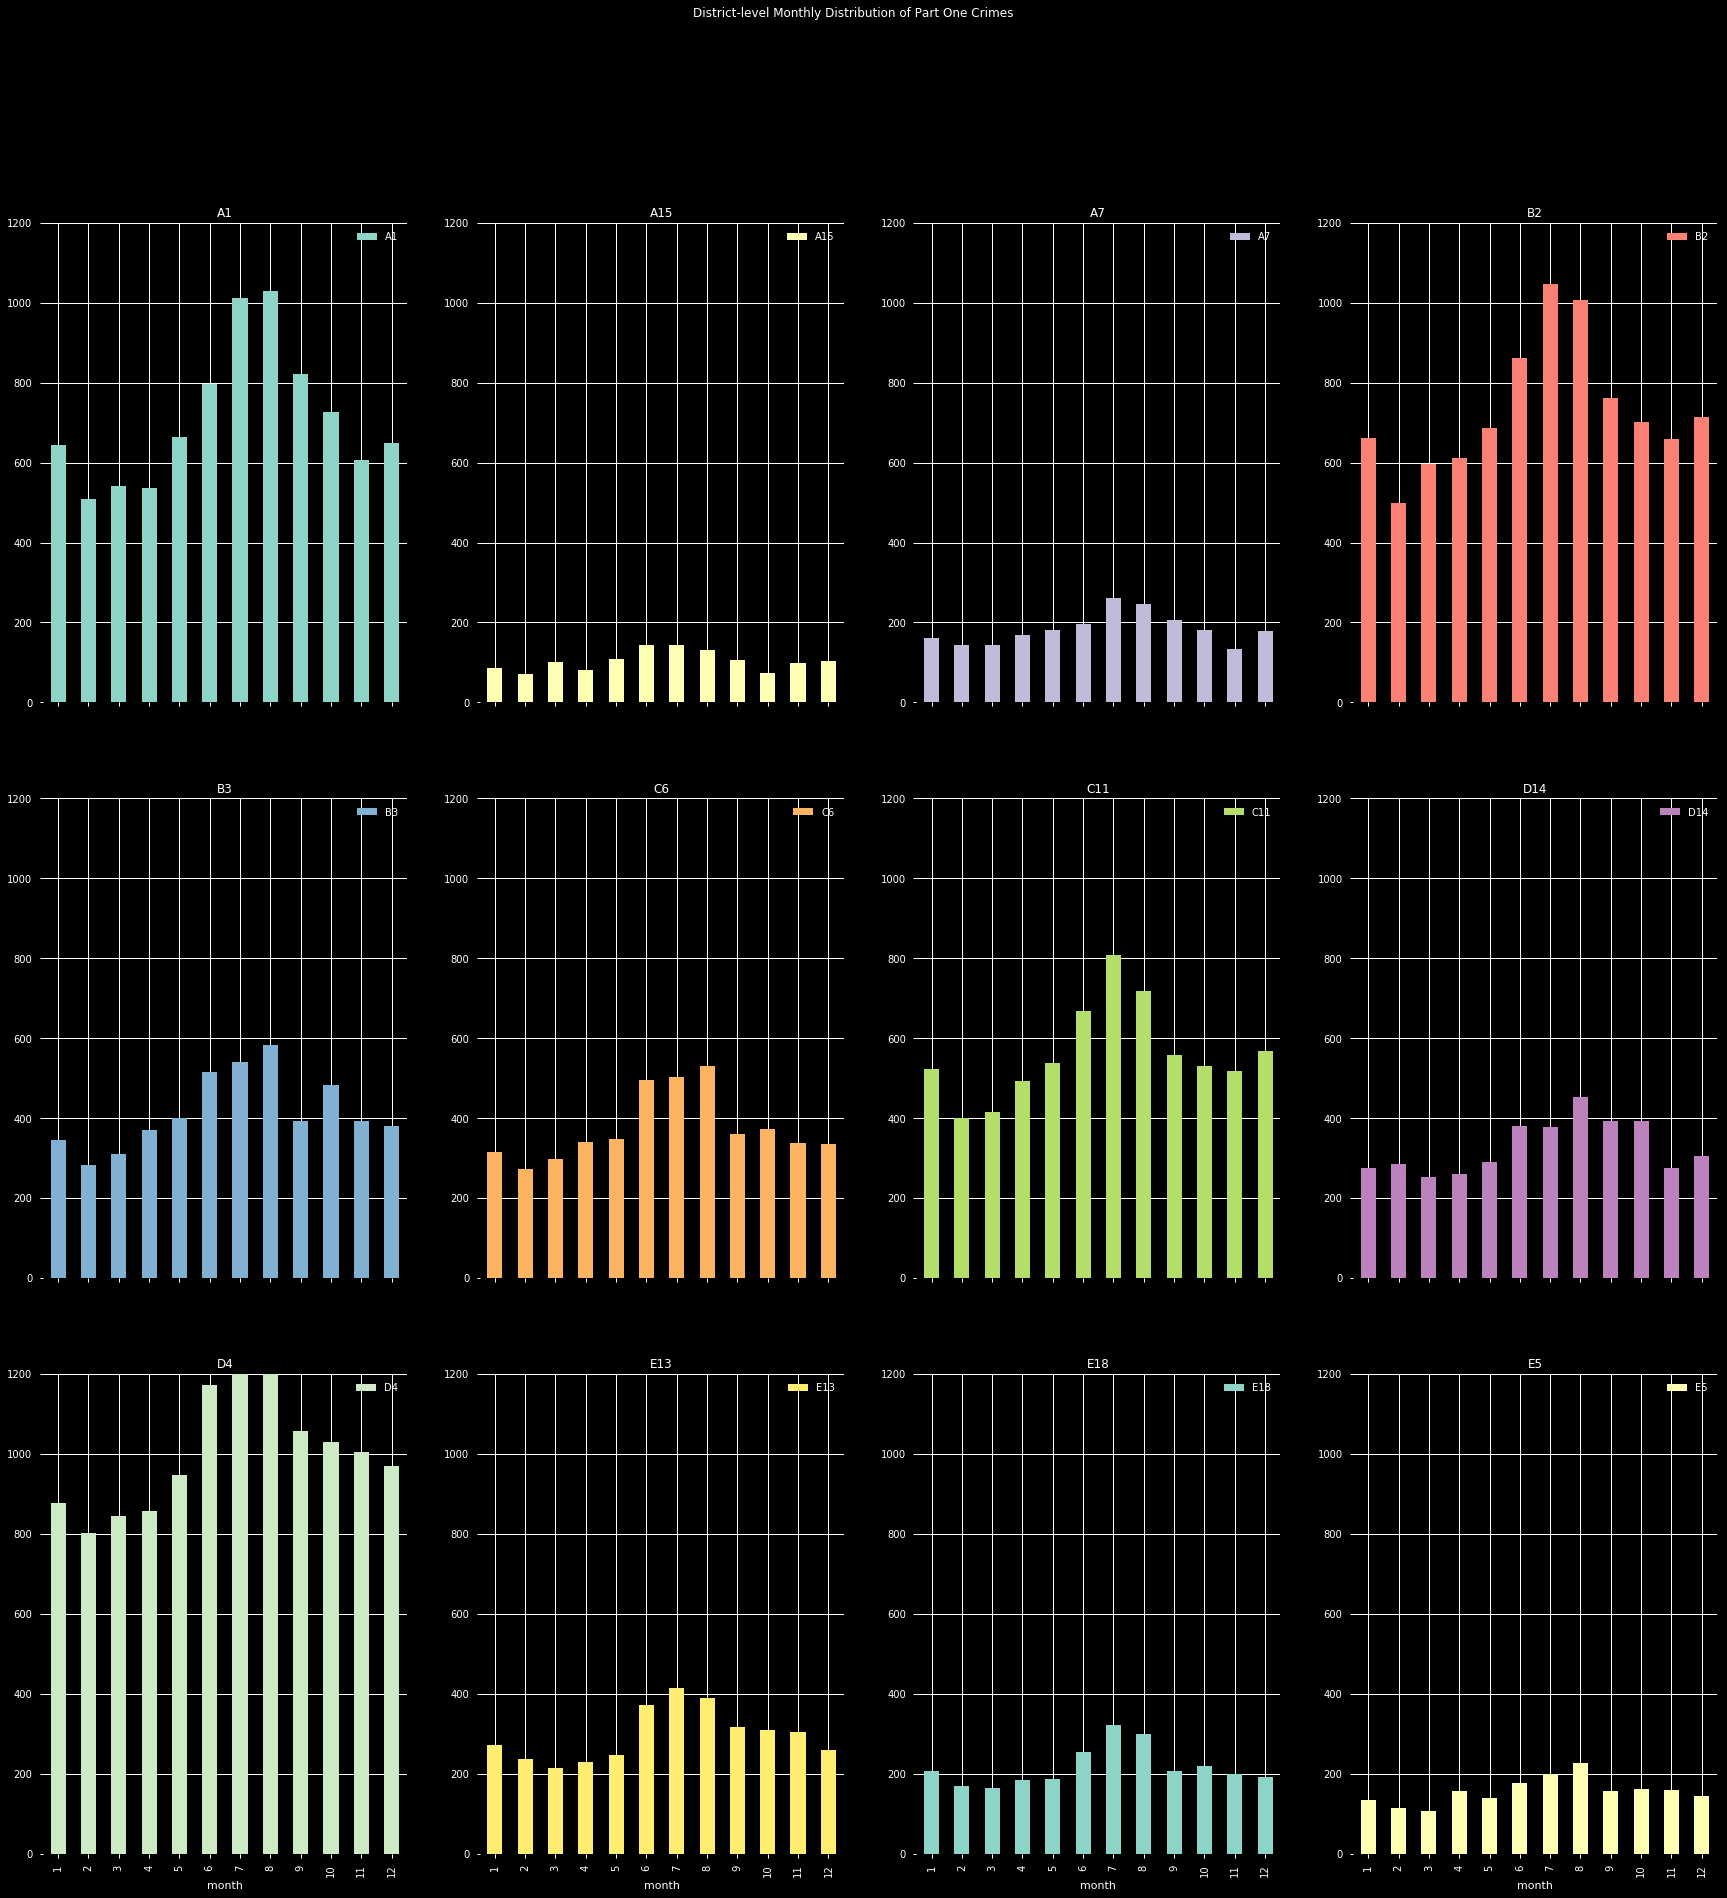

In [136]:
partone_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1200),
                           title = 'District-level Monthly Distribution of Part One Crimes')
plt.show()

In [130]:
# Part 2 monthly crime count

parttwo_D14 = pd.DataFrame(parttwo[parttwo.district=='D14'].groupby('month').count()['ucr_part'])
parttwo_C11 = pd.DataFrame(parttwo[parttwo.district=='C11'].groupby('month').count()['ucr_part'])
parttwo_D4 = pd.DataFrame(parttwo[parttwo.district=='D4'].groupby('month').count()['ucr_part'])
parttwo_B3 = pd.DataFrame(parttwo[parttwo.district=='B3'].groupby('month').count()['ucr_part'])
parttwo_B2 = pd.DataFrame(parttwo[parttwo.district=='B2'].groupby('month').count()['ucr_part'])
parttwo_C6 = pd.DataFrame(parttwo[parttwo.district=='C6'].groupby('month').count()['ucr_part'])
parttwo_A1 = pd.DataFrame(parttwo[parttwo.district=='A1'].groupby('month').count()['ucr_part'])
parttwo_E5 = pd.DataFrame(parttwo[parttwo.district=='E5'].groupby('month').count()['ucr_part'])
parttwo_A7 = pd.DataFrame(parttwo[parttwo.district=='A7'].groupby('month').count()['ucr_part'])
parttwo_E13 = pd.DataFrame(parttwo[parttwo.district=='E13'].groupby('month').count()['ucr_part'])
parttwo_E18 = pd.DataFrame(parttwo[parttwo.district=='E18'].groupby('month').count()['ucr_part'])
parttwo_A15 = pd.DataFrame(parttwo[parttwo.district=='A15'].groupby('month').count()['ucr_part'])

frames = [parttwo_A1, parttwo_A15, parttwo_A7, parttwo_B2, parttwo_B3, parttwo_C6, 
          parttwo_C11, parttwo_D14, parttwo_D4, parttwo_E13, parttwo_E18, parttwo_E5]

parttwo_districts = pd.concat(frames,axis=1)
parttwo_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
parttwo_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,821,159,322,1204,800,547,1035,394,883,380,368,328
2,752,116,304,1126,778,504,962,384,840,406,387,276
3,797,129,335,1325,946,653,1042,393,916,410,366,308
4,822,133,346,1274,887,614,1051,398,879,431,424,299
5,939,152,343,1306,952,523,1192,489,968,447,405,307
6,968,181,445,1543,1083,619,1269,501,1161,487,523,378
7,1250,193,465,1683,1185,793,1519,562,1347,587,549,398
8,1302,187,481,1794,1235,851,1381,543,1271,537,545,391
9,900,164,358,1357,866,562,1107,455,970,462,392,347


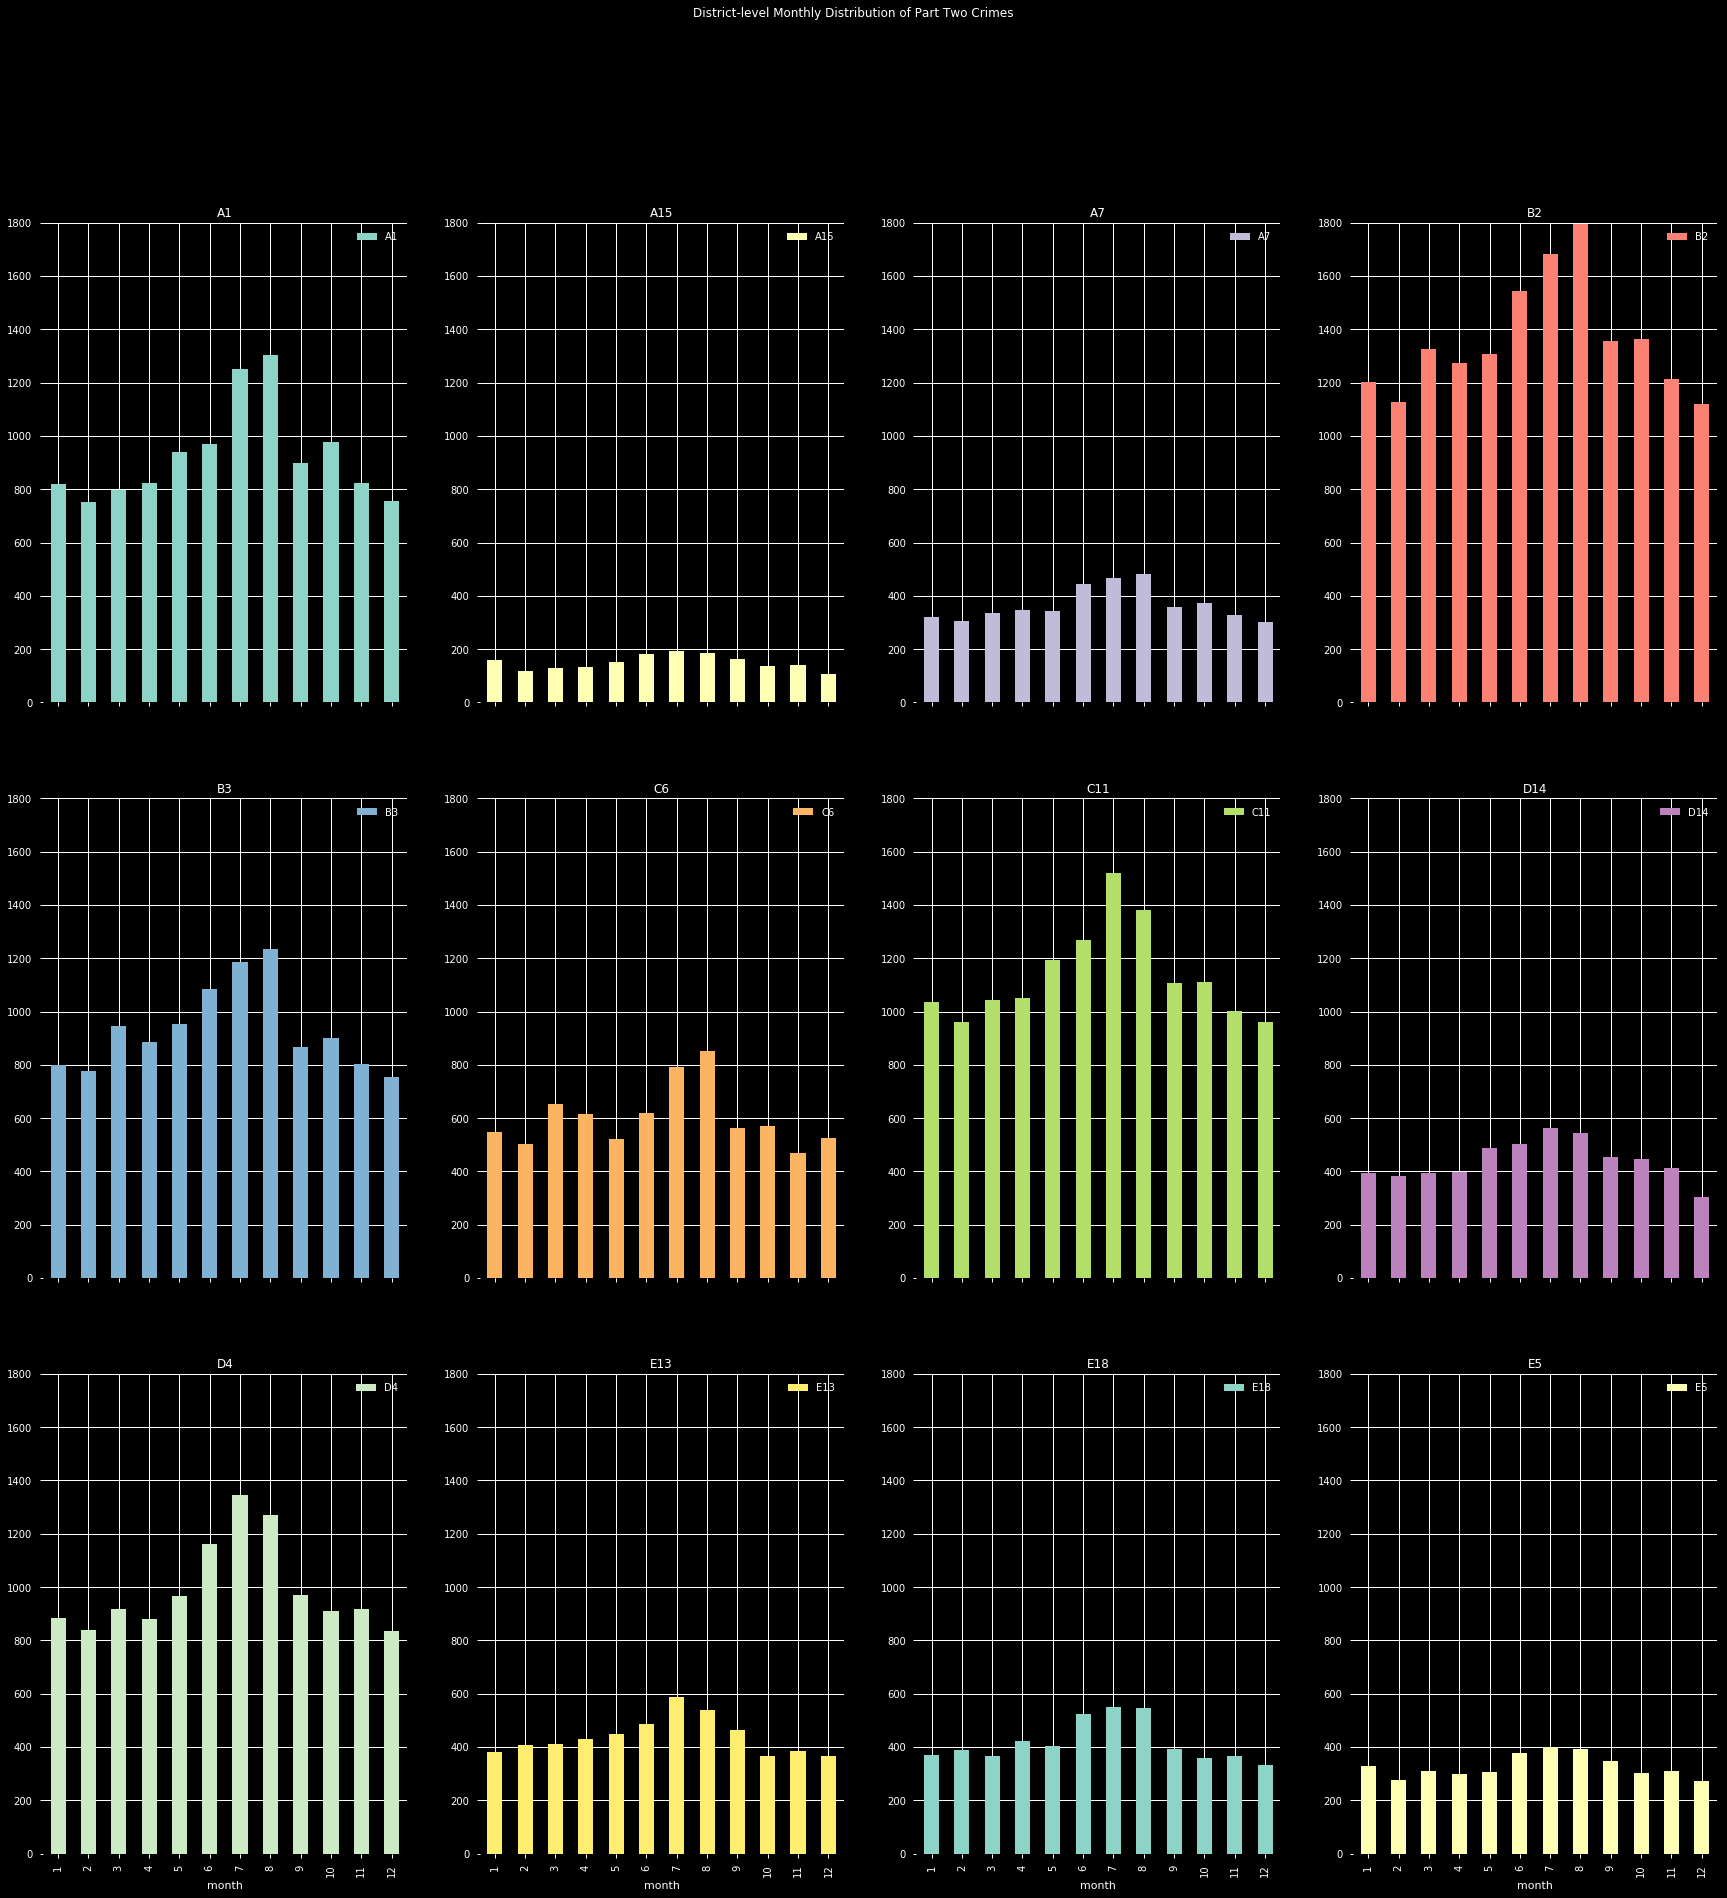

In [139]:
parttwo_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1800),
                           title = 'District-level Monthly Distribution of Part Two Crimes')
plt.show()

In [140]:
# Part 3 monthly crime count

partthree_D14 = pd.DataFrame(partthree[partthree.district=='D14'].groupby('month').count()['ucr_part'])
partthree_C11 = pd.DataFrame(partthree[partthree.district=='C11'].groupby('month').count()['ucr_part'])
partthree_D4 = pd.DataFrame(partthree[partthree.district=='D4'].groupby('month').count()['ucr_part'])
partthree_B3 = pd.DataFrame(partthree[partthree.district=='B3'].groupby('month').count()['ucr_part'])
partthree_B2 = pd.DataFrame(partthree[partthree.district=='B2'].groupby('month').count()['ucr_part'])
partthree_C6 = pd.DataFrame(partthree[partthree.district=='C6'].groupby('month').count()['ucr_part'])
partthree_A1 = pd.DataFrame(partthree[partthree.district=='A1'].groupby('month').count()['ucr_part'])
partthree_E5 = pd.DataFrame(partthree[partthree.district=='E5'].groupby('month').count()['ucr_part'])
partthree_A7 = pd.DataFrame(partthree[partthree.district=='A7'].groupby('month').count()['ucr_part'])
partthree_E13 = pd.DataFrame(partthree[partthree.district=='E13'].groupby('month').count()['ucr_part'])
partthree_E18 = pd.DataFrame(partthree[partthree.district=='E18'].groupby('month').count()['ucr_part'])
partthree_A15 = pd.DataFrame(partthree[partthree.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partthree_A1, partthree_A15, partthree_A7, partthree_B2, partthree_B3, partthree_C6, 
          partthree_C11, partthree_D14, partthree_D4, partthree_E13, partthree_E18, partthree_E5]

partthree_districts = pd.concat(frames,axis=1)
partthree_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partthree_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,1089,233,549,1897,1516,878,1650,752,1150,639,755,560
2,1079,256,497,1660,1300,779,1539,727,1208,597,712,527
3,1252,272,499,2010,1413,935,1698,811,1349,673,766,644
4,1220,261,561,1982,1446,881,1648,741,1375,695,683,554
5,1290,302,574,2034,1623,926,1850,947,1476,760,859,613
6,1477,359,673,2388,1772,1110,2023,1027,1735,834,972,702
7,1760,343,661,2525,2013,1233,2317,1168,1836,880,991,769
8,1847,377,731,2497,2130,1193,2381,1165,1854,915,1020,799
9,1343,259,532,2017,1535,990,1858,970,1474,672,719,579


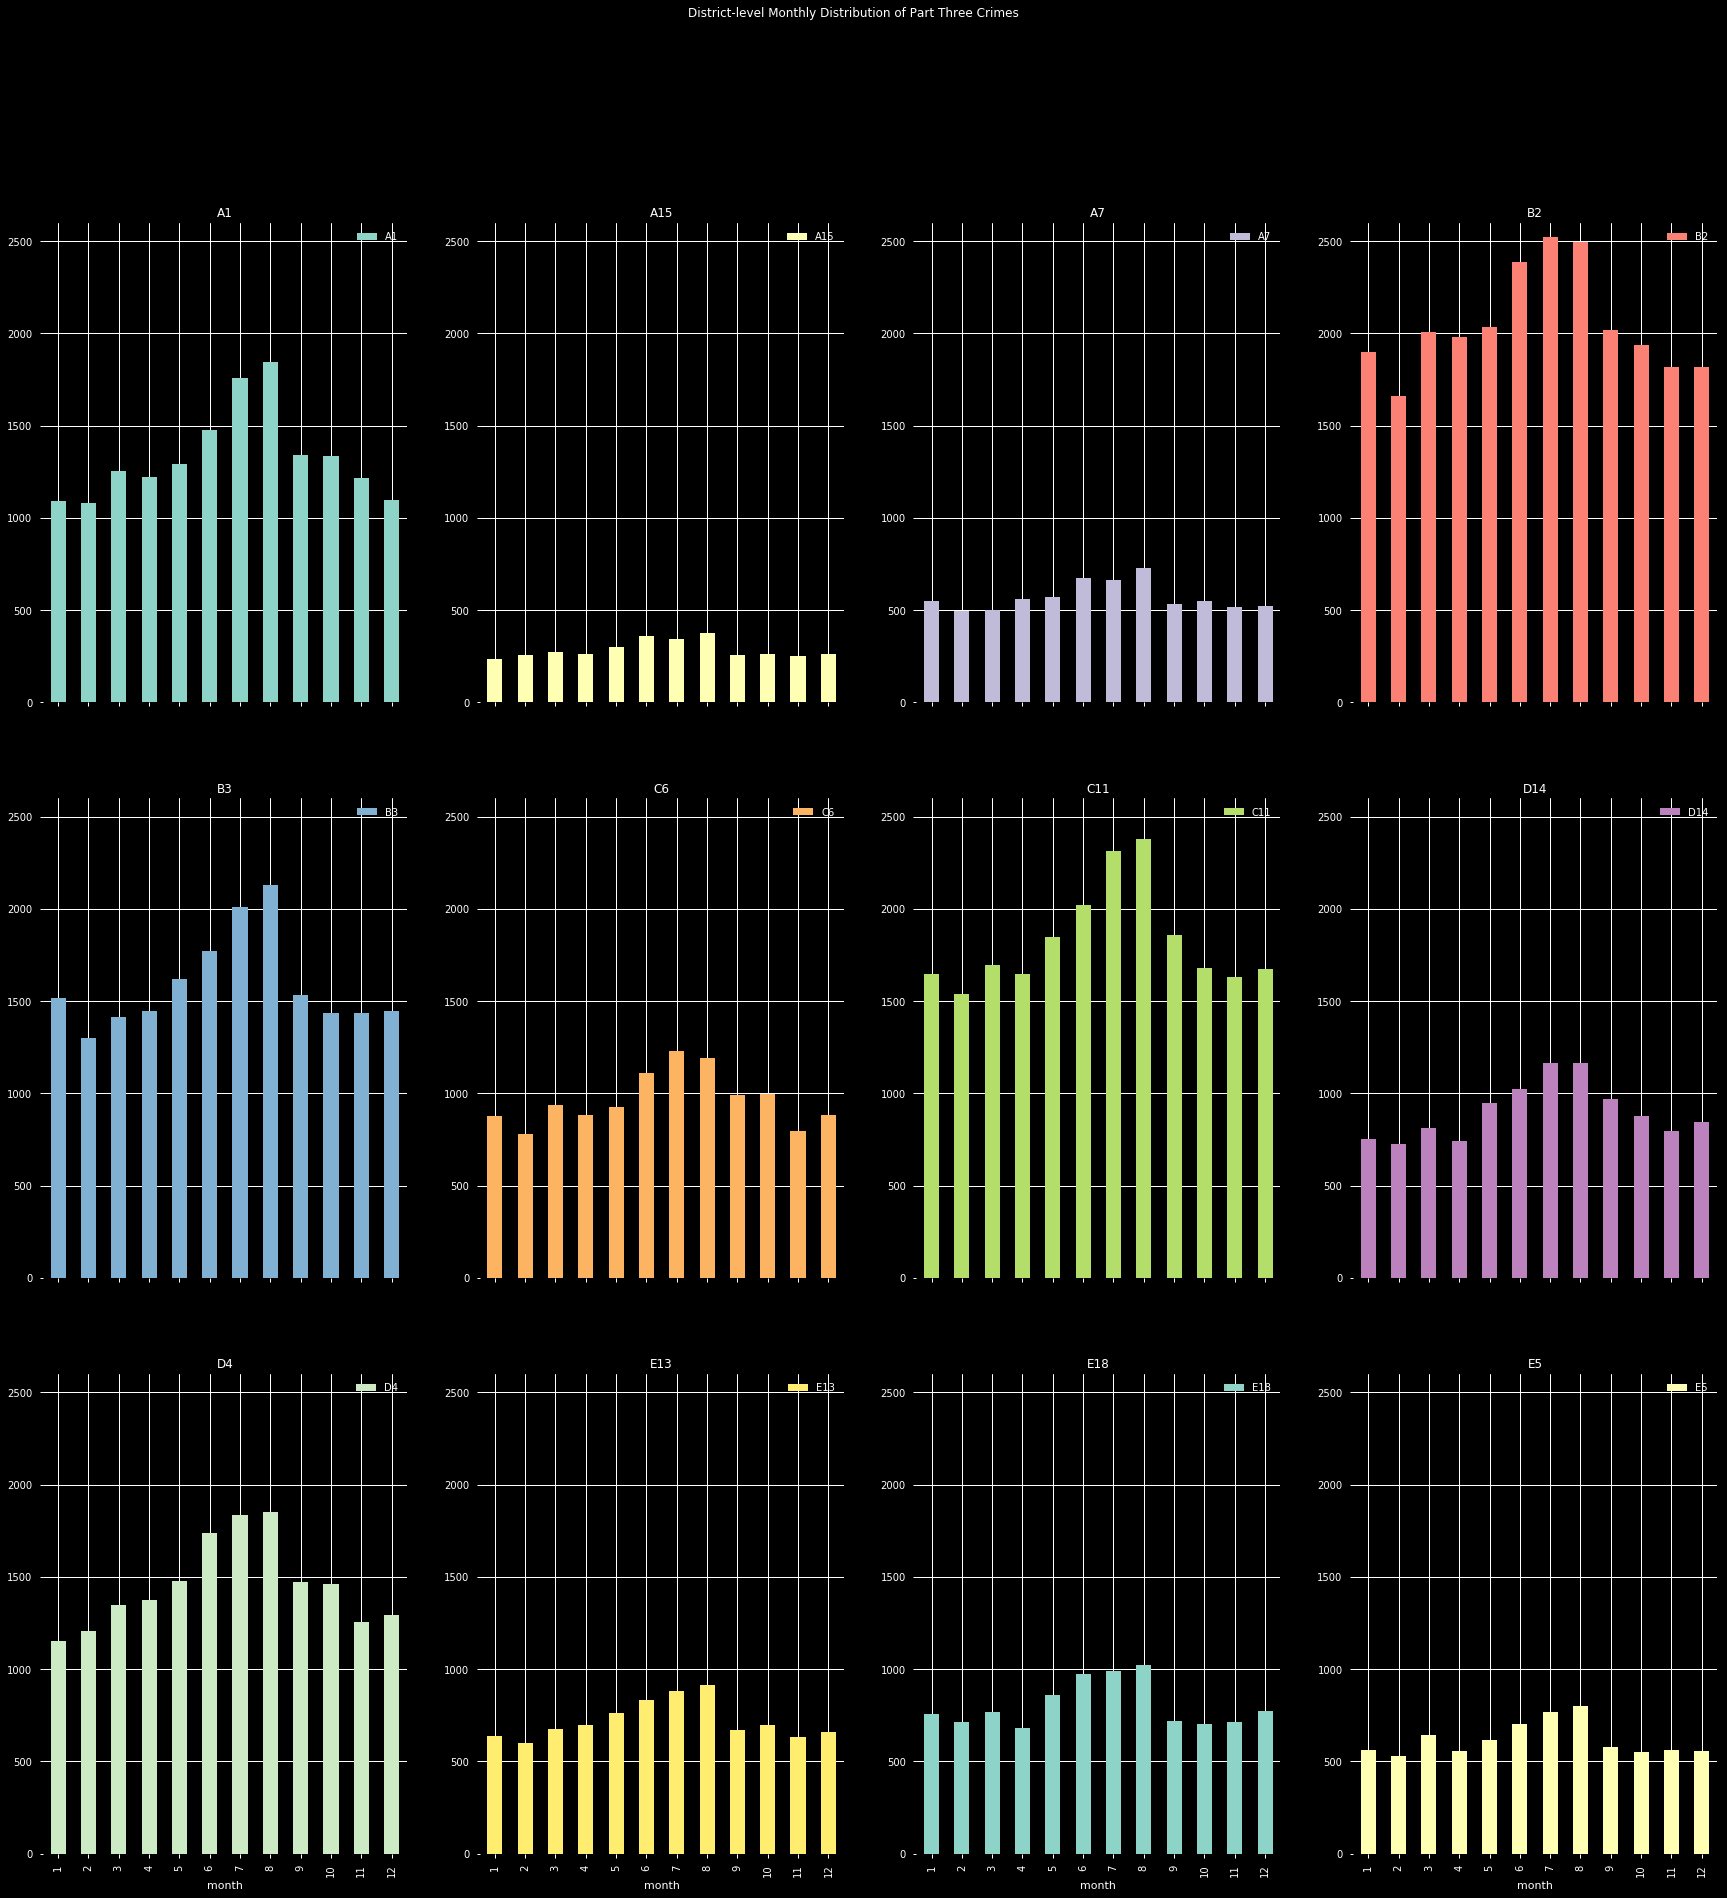

In [143]:
partthree_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,2600),
                           title = 'District-level Monthly Distribution of Part Three Crimes')
plt.show()